# Birmingham Parking Analysis

## Introduction:

The data set I chose to analyze was the one on Birmingham parking. I wanted to look at the parking data set because in California, we have to drive everywhere, and it would be useful to know when parking lots are at their fullest so that one could choose the best times to go shopping. 

In the data sets below, we will look at the questions:
1. What time of day is parking the busiest? 
2. Is there a difference in parking behavior between weekends and weekdays?
3. Is there a trend in parking? 

## Data Loading / Exploration

In [3]:
#When is parking the busiest?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('dataset/dataset_Parking.csv')
print(df.head())

  SystemCodeNumber  Capacity  Occupancy          LastUpdated
0      BHMBCCMKT01       577         61  2016-10-04 07:59:42
1      BHMBCCMKT01       577         64  2016-10-04 08:25:42
2      BHMBCCMKT01       577         80  2016-10-04 08:59:42
3      BHMBCCMKT01       577        107  2016-10-04 09:32:46
4      BHMBCCMKT01       577        150  2016-10-04 09:59:48


In [4]:
df.dtypes
df['LastUpdated'] = pd.to_datetime(df.LastUpdated)
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [5]:
df.dtypes

SystemCodeNumber            object
Capacity                     int64
Occupancy                    int64
LastUpdated         datetime64[ns]
dtype: object

In [6]:
df['Hour'] = df.LastUpdated.dt.hour
df['Day_of_the_Week'] = df.LastUpdated.dt.weekday_name

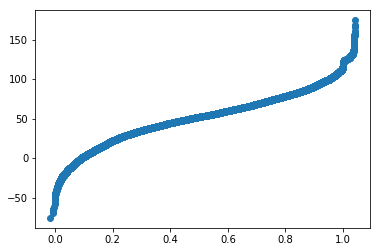

In [7]:
#The parking fraction tells us what percentage of the parking lot is filled at a given time.
df["Fraction"]=df["Occupancy"]/df["Capacity"]

rand1 = np.random.normal(50, 30, len(df))
fraction1 = df['Fraction']

rand1.sort()
fraction1 = fraction1.sort_values()

plt.plot(fraction1, rand1, "o") 
plt.show() 

The qq plot shows a non-normal distribution.

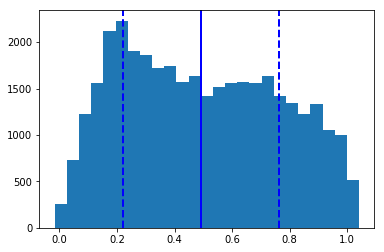

In [8]:
plt.hist(df["Fraction"], bins=25)
plt.axvline(df['Fraction'].mean(), color = 'b', linestyle='solid', linewidth=2)
plt.axvline(df['Fraction'].mean() + df['Fraction'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['Fraction'].mean()-df['Fraction'].std(), color='b', linestyle='dashed', linewidth=2) 

The histogram of the fraction of parking data shows a mean of 0.5 and a standard deviation of about 0.2.

In [9]:
#What is the standard deviation for occupancy?
np.std(df['Occupancy'], ddof=1)

656.9555345930048

The standard deviation for occupancy is about 657.

What are the mean, median, variance, and standard error for occupancy?

In [10]:
print (np.mean(df['Occupancy']))

import statistics
print (statistics.median(df['Occupancy']))
print (df['Occupancy'].var())
print (np.std(df['Occupancy'], ddof=1) / np.sqrt(len(df['Occupancy'])))

642.2289106027941
446
431590.57443238073
3.476149842736824


The mean is 624, the median is 446, the variance is 431591, and the standard error is 3.47. 

## Question 1
### What time of day is parking the busiest? 

In [11]:
result = df.groupby('Hour').mean()
print(result)

         Capacity   Occupancy  Fraction
Hour                                   
7     1337.565947  258.387290  0.209139
8     1399.202837  321.523892  0.253722
9     1400.197176  464.250433  0.371572
10    1399.241055  593.454427  0.466243
11    1397.543833  711.392615  0.546495
12    1399.540597  777.726848  0.590473
13    1398.028751  800.336555  0.605557
14    1396.856781  800.555640  0.607168
15    1399.229833  740.171487  0.561613
16    1401.601849  658.547657  0.501741


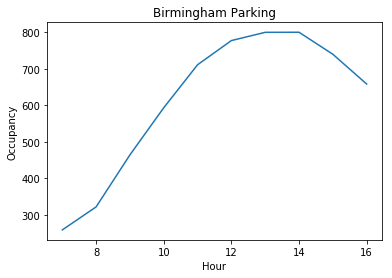

In [12]:
result['Occupancy'].plot()
plt.ylabel('Occupancy')
plt.title('Birmingham Parking')
plt.show()

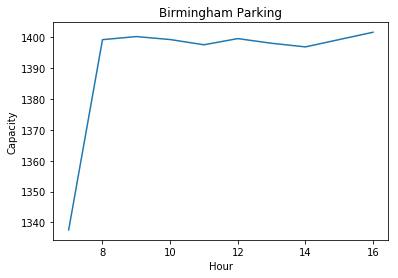

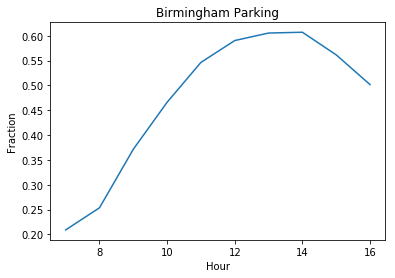

In [13]:
result['Capacity'].plot()
plt.ylabel('Capacity')
plt.title('Birmingham Parking')
plt.show()

result['Fraction'].plot()
plt.ylabel('Fraction')
plt.title('Birmingham Parking')
plt.show()

These plots show that the capacity doesn't change over time, and that the fraction of parking occupied is at its peak around 14:00.

## Question 2
### Is there a difference in parking behavior between weekends and weekdays?

In [14]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_of_the_Week'] = pd.Categorical(df['Day_of_the_Week'], categories=cats, ordered=True)
df = df.sort_values('Day_of_the_Week')
print (df.head())

      SystemCodeNumber  Capacity  Occupancy         LastUpdated  Hour  \
35716         Shopping      1920       1180 2016-12-19 16:30:35    16   
20411     Broad Street       690        612 2016-10-17 11:04:20    11   
20412     Broad Street       690        635 2016-10-17 11:31:18    11   
20413     Broad Street       690        657 2016-10-17 12:04:19    12   
20414     Broad Street       690        660 2016-10-17 12:31:21    12   

      Day_of_the_Week  Fraction  
35716          Monday  0.614583  
20411          Monday  0.886957  
20412          Monday  0.920290  
20413          Monday  0.952174  
20414          Monday  0.956522  


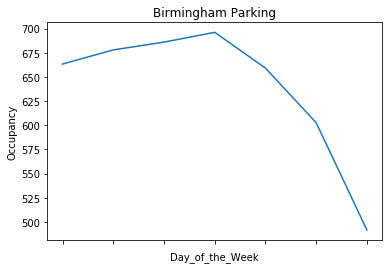

                    Capacity   Occupancy       Hour  Fraction
Day_of_the_Week                                              
Monday           1396.883333  663.399074  11.828148  0.514551
Tuesday          1388.119026  677.983153  11.777330  0.538876
Wednesday        1388.119026  686.064823  11.783556  0.539964
Thursday         1387.365443  696.160144  11.743729  0.547098
Friday           1386.282609  659.208333  11.868961  0.511671
Saturday         1434.069231  602.700641  11.797009  0.431389
Sunday           1406.455500  491.712217  11.709278  0.349149


In [15]:
result2 = df.groupby('Day_of_the_Week').mean()
result2['Occupancy'].plot()
plt.ylabel('Occupancy')
plt.title('Birmingham Parking')
plt.show()
print(result2)

When the fraction of parking values are sorted and put into a line graph, we can see that Thursdays have the highest occupancy at 696. This corresponds with the fraction value, which is the highest at 55%. Also, Sunday is the least busiest day, which has an occupancy of about 492 and a fraction of 35%.

In [16]:
#Splitting the data into two groups: weekdays and weekends
weekend = df[(df.Day_of_the_Week == 'Saturday') | (df.Day_of_the_Week == 'Sunday')]
print (weekend.head())


      SystemCodeNumber  Capacity  Occupancy         LastUpdated  Hour  \
22030        Bull Ring      3053       2005 2016-11-12 11:34:23    11   
22029        Bull Ring      3053       1676 2016-11-12 11:00:27    11   
22031        Bull Ring      3053       2206 2016-11-12 12:00:27    12   
22034        Bull Ring      3053       2705 2016-11-12 13:27:27    13   
3970       BHMBCCTHL01       387        338 2016-10-08 16:04:39    16   

      Day_of_the_Week  Fraction  
22030        Saturday  0.656731  
22029        Saturday  0.548968  
22031        Saturday  0.722568  
22034        Saturday  0.886014  
3970         Saturday  0.873385  


In [17]:
weekday = df[(df.Day_of_the_Week == 'Monday') | (df.Day_of_the_Week == 'Tuesday')| (df.Day_of_the_Week == 'Wednesday')| (df.Day_of_the_Week == 'Thursday')| (df.Day_of_the_Week == 'Friday')]
print (weekday.head())

      SystemCodeNumber  Capacity  Occupancy         LastUpdated  Hour  \
35716         Shopping      1920       1180 2016-12-19 16:30:35    16   
20411     Broad Street       690        612 2016-10-17 11:04:20    11   
20412     Broad Street       690        635 2016-10-17 11:31:18    11   
20413     Broad Street       690        657 2016-10-17 12:04:19    12   
20414     Broad Street       690        660 2016-10-17 12:31:21    12   

      Day_of_the_Week  Fraction  
35716          Monday  0.614583  
20411          Monday  0.886957  
20412          Monday  0.920290  
20413          Monday  0.952174  
20414          Monday  0.956522  


### Question 2.1

I will compare the occupancy fraction of the weekend and the weekdays against normal distributions, and then I compare the two data sets to see if they are normally distributed.

Text(0, 0.5, 'Fraction')

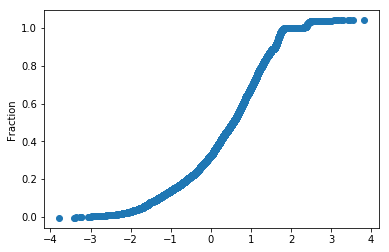

In [18]:
norm = np.random.normal(0, 1, 9444)
norm.sort()
weekend_sorted = weekend['Fraction'].sort_values()
plt.plot(norm, weekend_sorted, "o")
plt.ylabel('Fraction')


Text(0, 0.5, 'Fraction')

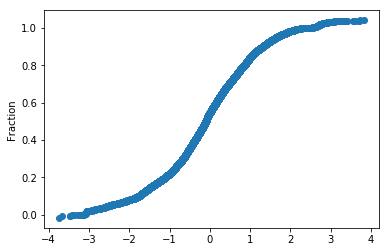

In [19]:
norm = np.random.normal(0, 1, 26273)
norm.sort()
weekday_sorted = weekday['Fraction'].sort_values()
plt.plot(norm, weekday_sorted, "o")
plt.ylabel('Fraction')

The weekend and weekday qq plots show non-normal distributions.

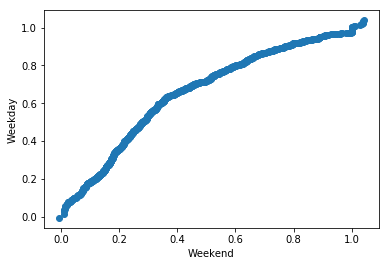

In [20]:
we_sample = weekend['Fraction'].sample(1000).sort_values()
wd_sample = weekday['Fraction'].sample(1000).sort_values()
plt.xlabel('Weekend')
plt.ylabel('Weekday')
plt.plot(we_sample, wd_sample, "o")

When plotted against each other, we see that the fraction distribution for weekends is different from weekdays.

### Question 2.2: Are the weekend and weekday data statistically significantly different?

In [48]:
from scipy.stats import ttest_ind
print(ttest_ind(weekend['Fraction'], weekday['Fraction'], equal_var=False))

Ttest_indResult(statistic=-44.86426215039406, pvalue=0.0)


The t-test shows us the error of the estimate of the population mean (or the standard distribution of the errors). The difference of the two means is 44 time larger than the error in the estimate of the means. This means that we can be relatively confident in our results.

## Question 3
### Is there a trend in parking?

Text(0.5, 0, 'Date')

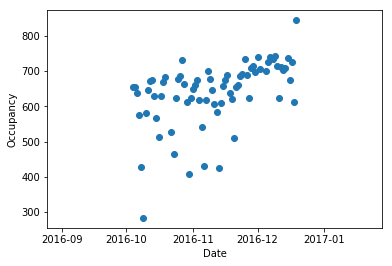

In [21]:
df['Date'] = df.LastUpdated.dt.date
date1 = df.groupby('Date').mean()
plt.scatter(date1.index, date1['Occupancy'])
plt.ylabel('Occupancy')
plt.xlabel('Date')

In this scatter plot, we can see that the parking occupancy is increasing over time.

Text(0.5, 0, 'Date')

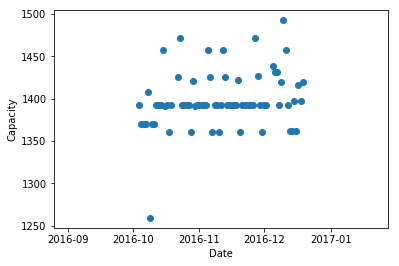

In [22]:
df['Date'] = df.LastUpdated.dt.date
date1 = df.groupby('Date').mean()
plt.scatter(date1.index, date1['Capacity'])
plt.ylabel('Capacity')
plt.xlabel('Date')

When checking the original data file, it does appear that the capacity changes from time to time. I am not sure why this happens, but maybe some of the parking lot is available for use at some time and not other times.

Text(0.5, 0, 'Date')

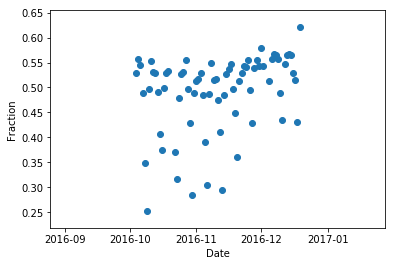

In [23]:
df['Date'] = df.LastUpdated.dt.date
date1 = df.groupby('Date').mean()
plt.scatter(date1.index, date1['Fraction'])
plt.ylabel('Fraction')
plt.xlabel('Date')

## Conclusion

In this project, I examined a CSV file which contained data on parking and occupancy. By looking at the parking fraction, the graphs show that parking is busier during the weekdays, and parking is less busy on the weekends. In addition, the information shows that there is an upward trend for parking. For further research, I would suggest collecting data over a longer period of time to see if there is really an upward trend; perhaps for the period of one year. I would also like to find out more about why the capacity changes - is it because there are more or less parking spaces that are allowed to be used at one time or another? In order to do this, I would observe the parking lot and see why the capacity changes. 